# BEE 4750 Homework 1: Introduction to Using Julia

**Name**: Christine Swanson

**ID**: cms549

> **Due Date**
>
> Friday, 9/8/23, 9:00pm

## Overview

### Instructions

-   Problems 1-3 consist of a series of code snippets for you to
    interpret and debug. For Problems 1 and 2, you will be asked to
    identify relevant error(s) and fix the code. For Problem 3, the code
    works as intended; your goal is to identify the code’s purpose by
    following its logic.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [49]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\chris\OneDrive\Documents\Cornell\classwork\BEE5750\homeworks\hw1\hw01-christinemswanson`


In [54]:
using Plots
using GraphRecipes
using LaTeXStrings
using Statistics

## Problems (Total: 40 Points)

### Problem 1 (8 points)

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [58]:
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 0


#### Problem 1.1 (3 points)

Describe the logic error.

My colleague mistakenly assigned the minimum value as 0, where they should have assigned it as the first index position of the array. This is because we want to go through the array one-by-one to find the minimum value. Because Julia starts indexing at 1 and not 0, this means we need to change `min_value` from 0 to array[1], which means we first want to retrieve the first value in the array to perform our comparisons. The rest of the code works perfectly fine. 

#### Problem 1.2 (3 points)

Write a fixed version of the function.

In [59]:
function minimum(array)
    min_value = array[1] # correct assignment of min_value
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.3 (2 points)

Use your fixed function to find the minimum value of `array_values`.

In [64]:
print("The minimum value of the specified array is: ", minimum(array_values))

The minimum value of the specified array is: 78

### Problem 2 (8 points)

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [51]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

UndefVarError: UndefVarError: `average_grade` not defined

#### Problem 2.1 (3 points)

Describe the logic and/or syntax error.

The first issue the class made was in defining `average_grade`. We want to take the average grade of `grades` (which is user input to the function) as opposed to the array `student_grades` itself. The next issue pertains to showing the `average_grade`. We need to call the function `class_average()` on the `student_grades` array in order to get the correct result. 

#### Problem 2.2 (3 points)

Write a fixed version of the code.

In [65]:
# correct class_average function
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(grades)
  return average_grade
end

class_average (generic function with 1 method)

#### Problem 2.3 (2 points)

Use your fixed code to compute the average grade for the class.

In [67]:
average_grade = class_average(student_grades)
print("The average grade in the class is: ", average_grade)

The average grade in the class is: 94.4

### Problem 3 (8 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [68]:
# return only unique values from a given array
function mystery_function(values)
    y = []
    for v in values
        if !(v in y) # if current value is not in y
            append!(y, v) # append the value to y
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


#### Problem 3.1 (4 points)

Explain the purpose of `mystery_function`.

`mystery_function` takes in an array by the user. Element-by-element, the function checks whether the current element is *not* in the array, `y`, which starts off as an empty array on the first iteration. If the current element is not in the array `y`, then it gets appended to `y`. This continues until we reach the last element of the array. Essentially, this function returns unique values from an array. Thus, with the example of `list_of_values`, we only wind up with the elements of 1, 2, 3, and 4 in the final result.      

#### Problem 3.2 (4 points)

Add comments to the code, explaining why and how it works. Refer to
[“Best Practices for Writing Code
Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
and remember that bad comments can be just as bad as no comments at all.
You do not need to add comments to every line (in fact, this is very bad
practice), but you should note the *purpose* of every “section” of code,
and add comments explaining any code sequences that you don’t
immediately understand.

### Problem 4 (16 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

#### Problem 4.1 (3 points)

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

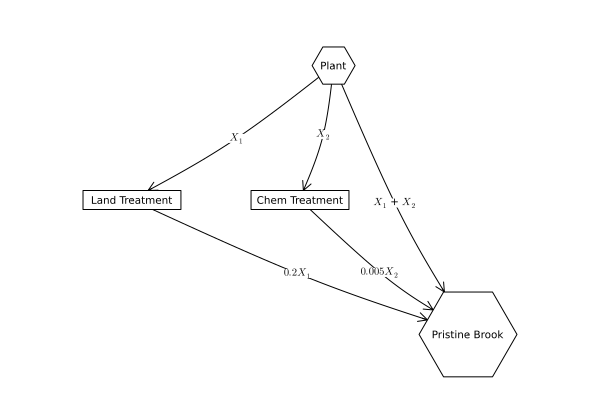

In [69]:
using GraphRecipes, Plots

A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"$X_1$", (1,3) => L"$X_2$", (1, 4) => L"$X_1$ + $X_2$",(2, 4) => L"$0.2X_1$",(3, 4) => L"$0.005X_2$")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)

#### Problem 4.2 (4 points)

Formulate a mathematical model for the treatment cost and the amount of
YUK that will be discharged into Pristine Brook based on the wastewater
allocations. This is best done with some equations and supporting text
explaining the derivation. Make sure you include, as additional
equations in the model, any needed constraints on relevant values. You
can find some basics on writing mathematical equations using the LaTeX
typesetting syntax
[here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
and a cheatsheet with LaTeX commands can be found on the course
website’s [Resources
page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

Model:

0.2 $X_1$ + 0.005 $X_2$ <= 20

$X_1^2/20$ + 1.5 $X_2$ = cost

$X_1$ + $X_2$ = 100 = constraint

#### Problem 4.3 (4 points)

Implement this systems model as a Julia function which computes the
resulting YUK concentration and cost for a particular treatment plan.
You can return multiple values from a function with a
[tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1), as
in:

In [7]:
function multiple_return_values(x, y)
    return (x+y, x*y)
end

a, b = multiple_return_values(2, 5)
@show a;
@show b;

a = 7
b = 10

In [109]:
# compute [YUK] and cost per treatment plan 
function yuk_and_cost_per_treatment(x1, x2) # function takes 2 wastewater discharge values that sum to 100
    yuk_conc_land = 0.2*(x1)
    yuk_conc_chemical = 0.005*(x2)
    land_cost = ((x1)^2)/20
    chemical_cost = 1.5*(x2)
    
    return (yuk_conc_land, land_cost, yuk_conc_chemical, chemical_cost)
end

yuk_and_cost_per_treatment (generic function with 1 method)

In [110]:
yuk_and_cost_per_treatment(40, 60) # test the function on chosen x1 and x2

(8.0, 80.0, 0.3, 90.0)

Make sure you comment your code appropriately to make it clear what is
going on and why.

#### Problem 4.4 (5 points)

Use your function to experiment with some different combinations of
wastewater discharge and treatment. Can you find one that satisfies the
YUK effluent standard? What was the cost? You don’t have to find an
“optimal” solution to this problem, but what do you think would be
needed to find a better solution?

## References

List any external references consulted, including classmates.